In [1]:
import numpy as np
from environments_with_LLM import SARenvLLM, HRLSARenvLLM
from agents_all import QLearningAgent, QLearningAgentAttention, HierarchicalQLearningAgent, HierarchicalQLearningAgentAttention
from utils_functions import plot_learning_curve, policy_evaluation, policy_evaluation_HRL

USER_AGENT environment variable not set, consider setting it to identify your requests.


document json will be infused
State Space [((0, 0), False, False, False), ((0, 0), False, False, True), ((0, 0), False, True, False), ((0, 0), False, True, True), ((0, 0), True, False, False), ((0, 0), True, False, True), ((0, 0), True, True, False), ((0, 0), True, True, True), ((0, 1), False, False, False), ((0, 1), False, False, True), ((0, 1), False, True, False), ((0, 1), False, True, True), ((0, 1), True, False, False), ((0, 1), True, False, True), ((0, 1), True, True, False), ((0, 1), True, True, True), ((0, 2), False, False, False), ((0, 2), False, False, True), ((0, 2), False, True, False), ((0, 2), False, True, True), ((0, 2), True, False, False), ((0, 2), True, False, True), ((0, 2), True, True, False), ((0, 2), True, True, True), ((0, 3), False, False, False), ((0, 3), False, False, True), ((0, 3), False, True, False), ((0, 3), False, True, True), ((0, 3), True, False, False), ((0, 3), True, False, True), ((0, 3), True, True, False), ((0, 3), True, True, True), ((0, 4), Fals

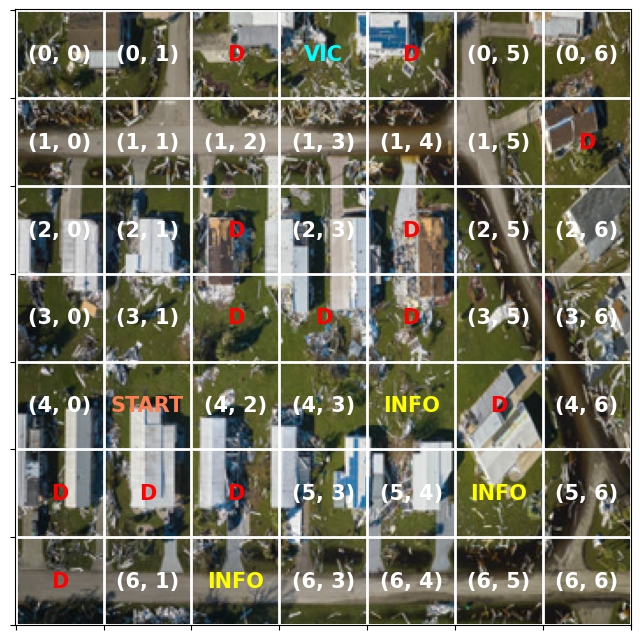

In [4]:
# Example initialization and training
gridsize = [7, 7]
startState = [(4, 1)]
victimStates = [(0, 3)]
ditches = [(1, 6), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4), (4, 5), \
    (5, 0), (5, 1), (5, 2), (6, 0), (0, 2), (0, 4)]
fires = []
POIs = []  # Victim locations
infoLocation = [(4, 4), (6, 2), (5, 5)]  # Location to ask for information was (6, 1)

image_path = "/home/dimi/HRL-LLM/images/disaster_area.jpg"
document_path = "/home/dimi/HRL-LLM/data/sar_data.json"

env = SARenvLLM(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='debug')

In [3]:
### flat agent (5 runs -- 1500 episodes) 
all_total_rewards_AGENT_flat = []  # List to store total rewards from each run
for _ in range(1):
    EPISODES = 1500
    ALPHA = 0.1
    GAMMA = 0.98
    EPSILON_MAX = 1.0
    EPSILON_MIN = 0.01
    DECAY_RATE = 2
    agent_flat = QLearningAgent(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES)
    Q_table0, total_returns0, state_visitations_simple0, exploration_simple0, exploitation_simple0, total_steps0, eps_history0 = agent_flat.train_agent()

    all_total_rewards_AGENT_flat.append(total_returns0)
    
avg_total_rewards_AGENT_flat = np.mean(all_total_rewards_AGENT_flat, axis=0)

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 1, updating n_results = 1


episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -78 | ε: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances of heat at the bakery. Police told us that no access allowed around the petrol station.
Hazardous Coordinates: [(5, 6), (6, 5), (3, 6), (2, 5)]
Point of Interest Coordinates: [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
real LLM is about to end handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -44 | ε: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances of heat at the bakery. Police told us that no access allowed around the petrol station.
Hazardous Coordinates: [(5, 6), (6, 5), (3, 6), (2, 5)]
Point of Interest Coordinates: [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
real LLM is about to end handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances

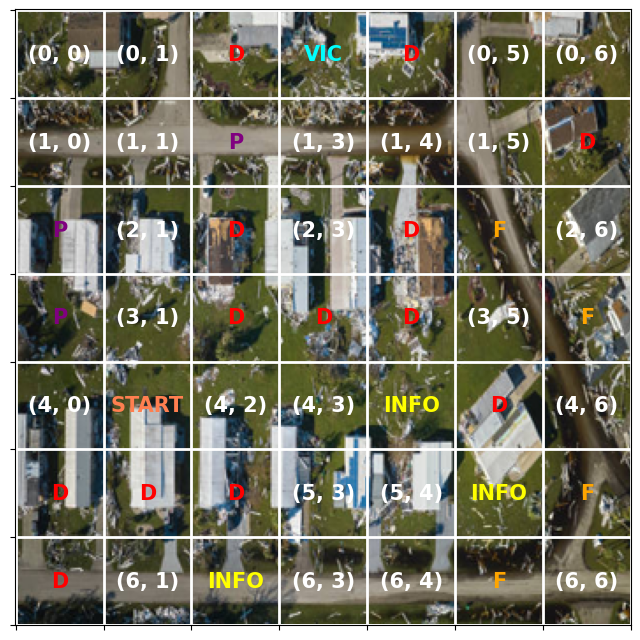

In [5]:
### flat-attention agent (5 runs - 1500 episodes)
all_total_rewards_AGENT_flat_att = []  # List to store total rewards from each run
for _ in range(1):
    EPISODES = 1500
    ALPHA = 0.1
    GAMMA = 0.98
    EPSILON_MAX = 1.0
    EPSILON_MIN = 0.01
    DECAY_RATE = 2
    agent_flat_ATT = QLearningAgentAttention(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES)
    Q_table, total_returns, state_visitations_simple, exploration_simple, exploitation_simple, total_steps, eps_history, attention = agent_flat_ATT.train_agent()


    all_total_rewards_AGENT_flat_att.append(total_returns)
    
avg_total_rewards_AGENT_flat_att = np.mean(all_total_rewards_AGENT_flat_att, axis=0)

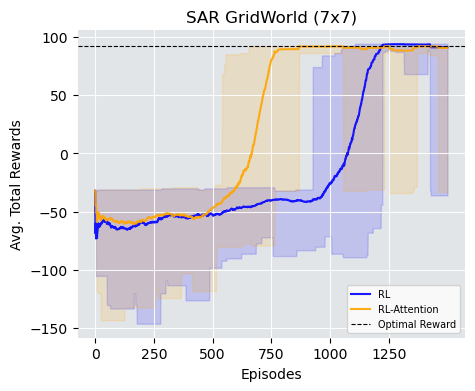

In [6]:
labels = ["RL", "RL-Attention"]
colors = ["blue", "orange"]
total_rewards_list = [avg_total_rewards_AGENT_flat, avg_total_rewards_AGENT_flat_att]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=92)

In [7]:
agents = [agent_flat, agent_flat_ATT]
for selected_agent in agents:
    policy_evaluation(env, num_eval_episodes = 1, max_eval_steps_per_episode = 100, agent=selected_agent)

Evaluating policy for agent: Flat
In ((4, 1), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -1
In ((4, 2), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -2
In ((4, 3), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -3
In ((4, 4), False, False, False) --> ASK --> get 5 reward | TOTAL REWARD 2
In ((4, 4), True, False, False) --> DOWN --> get -1 reward | TOTAL REWARD 1
In ((5, 4), True, False, False) --> LEFT --> get -1 reward | TOTAL REWARD 0
In ((5, 3), True, False, False) --> DOWN --> get -1 reward | TOTAL REWARD -1
In ((6, 3), True, False, False) --> LEFT --> get -1 reward | TOTAL REWARD -2
In ((6, 2), True, False, False) --> ASK_Y --> get 5 reward | TOTAL REWARD 3
In ((6, 2), True, True, False) --> RIGHT --> get -1 reward | TOTAL REWARD 2
In ((6, 3), True, True, False) --> RIGHT --> get -1 reward | TOTAL REWARD 1
In ((6, 4), True, True, False) --> UP --> get -1 reward | TOTAL REWARD 0
In ((5, 4), True, True, False) --> RIGHT --> ge

In [4]:
env = HRLSARenvLLM()

document json will be infused


In [3]:
all_total_rewards_AGENT_hier = []  # List to store total rewards from each run
EPISODES = 1500
for _ in range(1):
    # Manager for choosing options
    manager_hier = HierarchicalQLearningAgent(env, 785, 3)  # State space size 7*7*2*2*2*2, 3 options
    explore_worker_hier = HierarchicalQLearningAgent(env, 785, 4)  # [Up, down, left, right]
    collect_worker_hier = HierarchicalQLearningAgent(env, 785, 6)  # [A, B, C, X, Y, Z]
    operate_worker_hier = HierarchicalQLearningAgent(env, 785, 4)  # [save, use, remove, carry]

    workers_hier = {
        0: explore_worker_hier,  # Worker for EXPLORE
        1: collect_worker_hier,  # Worker for COLLECT
        2: operate_worker_hier   # Worker for OPERATE
    }
    hier_returns, workers_simple = manager_hier.train(manager_hier, workers_hier, EPISODES)
    all_total_rewards_AGENT_hier.append(hier_returns)
    
avg_total_rewards_AGENT_hier = np.mean(all_total_rewards_AGENT_hier, axis=0)

Number of requested results 4 is greater than number of elements in index 1, updating n_results = 1


Episode: 0, Total Reward: 0, Exploration Rate: 1.0
Episode: 250, Total Reward: -42, Exploration Rate: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances of heat at the bakery. Police told us that no access allowed around the petrol station.
Hazardous Coordinates: [(5, 6), (6, 5), (3, 6), (2, 5)]
Point of Interest Coordinates: [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
real LLM is about to end handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are

In [5]:
all_total_rewards_AGENT_hier_att = []  # List to store total rewards from each run
EPISODES = 1500
for _ in range(1):
    manager_hier_att = HierarchicalQLearningAgentAttention(env, 785, 3)  # State space size 7*7*2*2*2*2, 3 options
    explore_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 4)  # [Up, down, left, right]
    collect_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 6)  # [A, B, C, X, Y, Z]
    operate_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 4)  # [save, use, remove, carry] 

    workers_hier_att = {
        0: explore_worker_hier_att,  # Worker for EXPLORE
        1: collect_worker_hier_att,  # Worker for COLLECT
        2: operate_worker_hier_att   # Worker for OPERATE
    }
    hier_att_returns, attention, workers = manager_hier_att.train(manager_hier_att, workers_hier_att, EPISODES)
    all_total_rewards_AGENT_hier_att.append(hier_att_returns)
    
avg_total_rewards_AGENT_hier_att = np.mean(all_total_rewards_AGENT_hier_att, axis=0)

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


Episode: 0, Total Reward: 0, Exploration Rate: 1.0
Episode: 250, Total Reward: -31, Exploration Rate: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are also reports of significant instances of heat at the bakery. Police told us that no access allowed around the petrol station.
Hazardous Coordinates: [(5, 6), (6, 5), (3, 6), (2, 5)]
Point of Interest Coordinates: [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
real LLM is about to end handling the input Hey, there's a victim at the hospital. A fire was reported at the train station. There is a fire at the bank. A safe area is the mall. You must go to the access route in the school. Another access route at the restaurant. And there is a shelter in the shop. There are

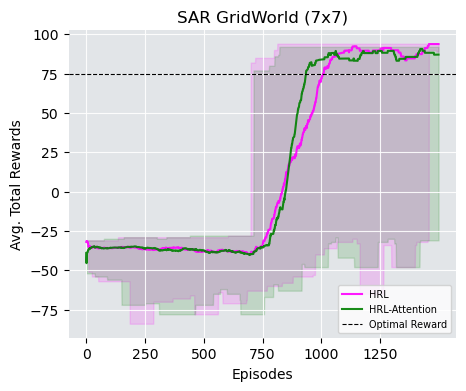

In [6]:
labels = ["HRL", "HRL-Attention"]
colors = ["magenta", "green"]
total_rewards_list = [avg_total_rewards_AGENT_hier, avg_total_rewards_AGENT_hier_att]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=75)

In [7]:
hierarchical_agents = [manager_hier, manager_hier_att]
workers_sets = [workers_hier, workers_hier_att]  # Corresponding sets of workers for each manager
for idx, selected_hierarchical_agent in enumerate(hierarchical_agents):
    selected_workers = workers_sets[idx]  # Select the corresponding workers for the current manager
    policy_evaluation_HRL(env, selected_workers, num_eval_episodes=1, agent=selected_hierarchical_agent)


Evaluating policy for agent: HRL
In [4, 1, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 2, 0, 0, 0, 0]
In [4, 2, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 3, 0, 0, 0, 0]
In [4, 3, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 4, 0, 0, 0, 0]
In [4, 4, 0, 0, 0, 0], Option 1, Action 0, Reward 5, Next State [4, 4, 1, 0, 0, 0]
In [4, 4, 1, 0, 0, 0], Option 0, Action 1, Reward -1, Next State [5, 4, 1, 0, 0, 0]
In [5, 4, 1, 0, 0, 0], Option 0, Action 2, Reward -1, Next State [5, 3, 1, 0, 0, 0]
In [5, 3, 1, 0, 0, 0], Option 0, Action 1, Reward -1, Next State [6, 3, 1, 0, 0, 0]
In [6, 3, 1, 0, 0, 0], Option 0, Action 2, Reward -1, Next State [6, 2, 1, 0, 0, 0]
In [6, 2, 1, 0, 0, 0], Option 1, Action 1, Reward 5, Next State [6, 2, 1, 1, 0, 0]
In [6, 2, 1, 1, 0, 0], Option 0, Action 3, Reward -1, Next State [6, 3, 1, 1, 0, 0]
In [6, 3, 1, 1, 0, 0], Option 0, Action 3, Reward -1, Next State [6, 4, 1, 1, 0, 0]
In [6, 4, 1, 1, 0, 0], Option 0, Action 3, Re